In [2]:
# import librairie
import pandas as pd
import nltk
import missingno as msno
import matplotlib.pyplot as plt

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import spacy
from nltk.corpus import stopwords

import pyLDAvis
import pyLDAvis.gensim

import re
from wordcloud import WordCloud
from pprint import pprint

import os
import pickle

import plotly.express as px

2023-05-25 09:59:54.310193: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-25 09:59:54.564747: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-25 09:59:55.597613: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-05-25 09:59:55.597825: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

# CLASSIFICATION

In [31]:
tags.head()

,Tags
0,Analysis of PDEs
1,Applications
2,Artificial Intelligence
3,Astrophysics of Galaxies
4,Computation and Language


# lda

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/ahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# import data
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
tags = pd.read_csv('data/Tags.csv')
ss = pd.read_csv('data/sample_sub.csv')

In [5]:
train.shape

(14004, 31)

In [6]:
train.head(3)

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Methodology,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
train.ABSTRACT[3090]

'the central question inside science of science concerns how time affects citations. despite a long-standing interests and its broad impact, we lack systematic answers to this simple yet fundamental question. by reviewing and classifying prior studies considering a past 50 years, we find the significant lack of consensus inside a literature, primarily due to a coexistence of retrospective and prospective approaches to measuring citation age distributions. these two approaches have been pursued inside parallel, lacking any known connections between a two. here we developed the new theoretical framework that not only allows us to connect a two approaches through precise mathematical relationships, it also helps us reconcile a interplay between temporal decay of citations and a growth of science, helping us uncover new functional forms characterizing citation age distributions. we find retrospective distribution follows the lognormal distribution with exponential cutoff, while prospective

/home/ahmed/.pyenv/versions/3.10.6/envs/simplon/lib/python3.10/site-packages/missingno/missingno.py:73: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
/home/ahmed/.pyenv/versions/3.10.6/envs/simplon/lib/python3.10/site-packages/missingno/missingno.py:142: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

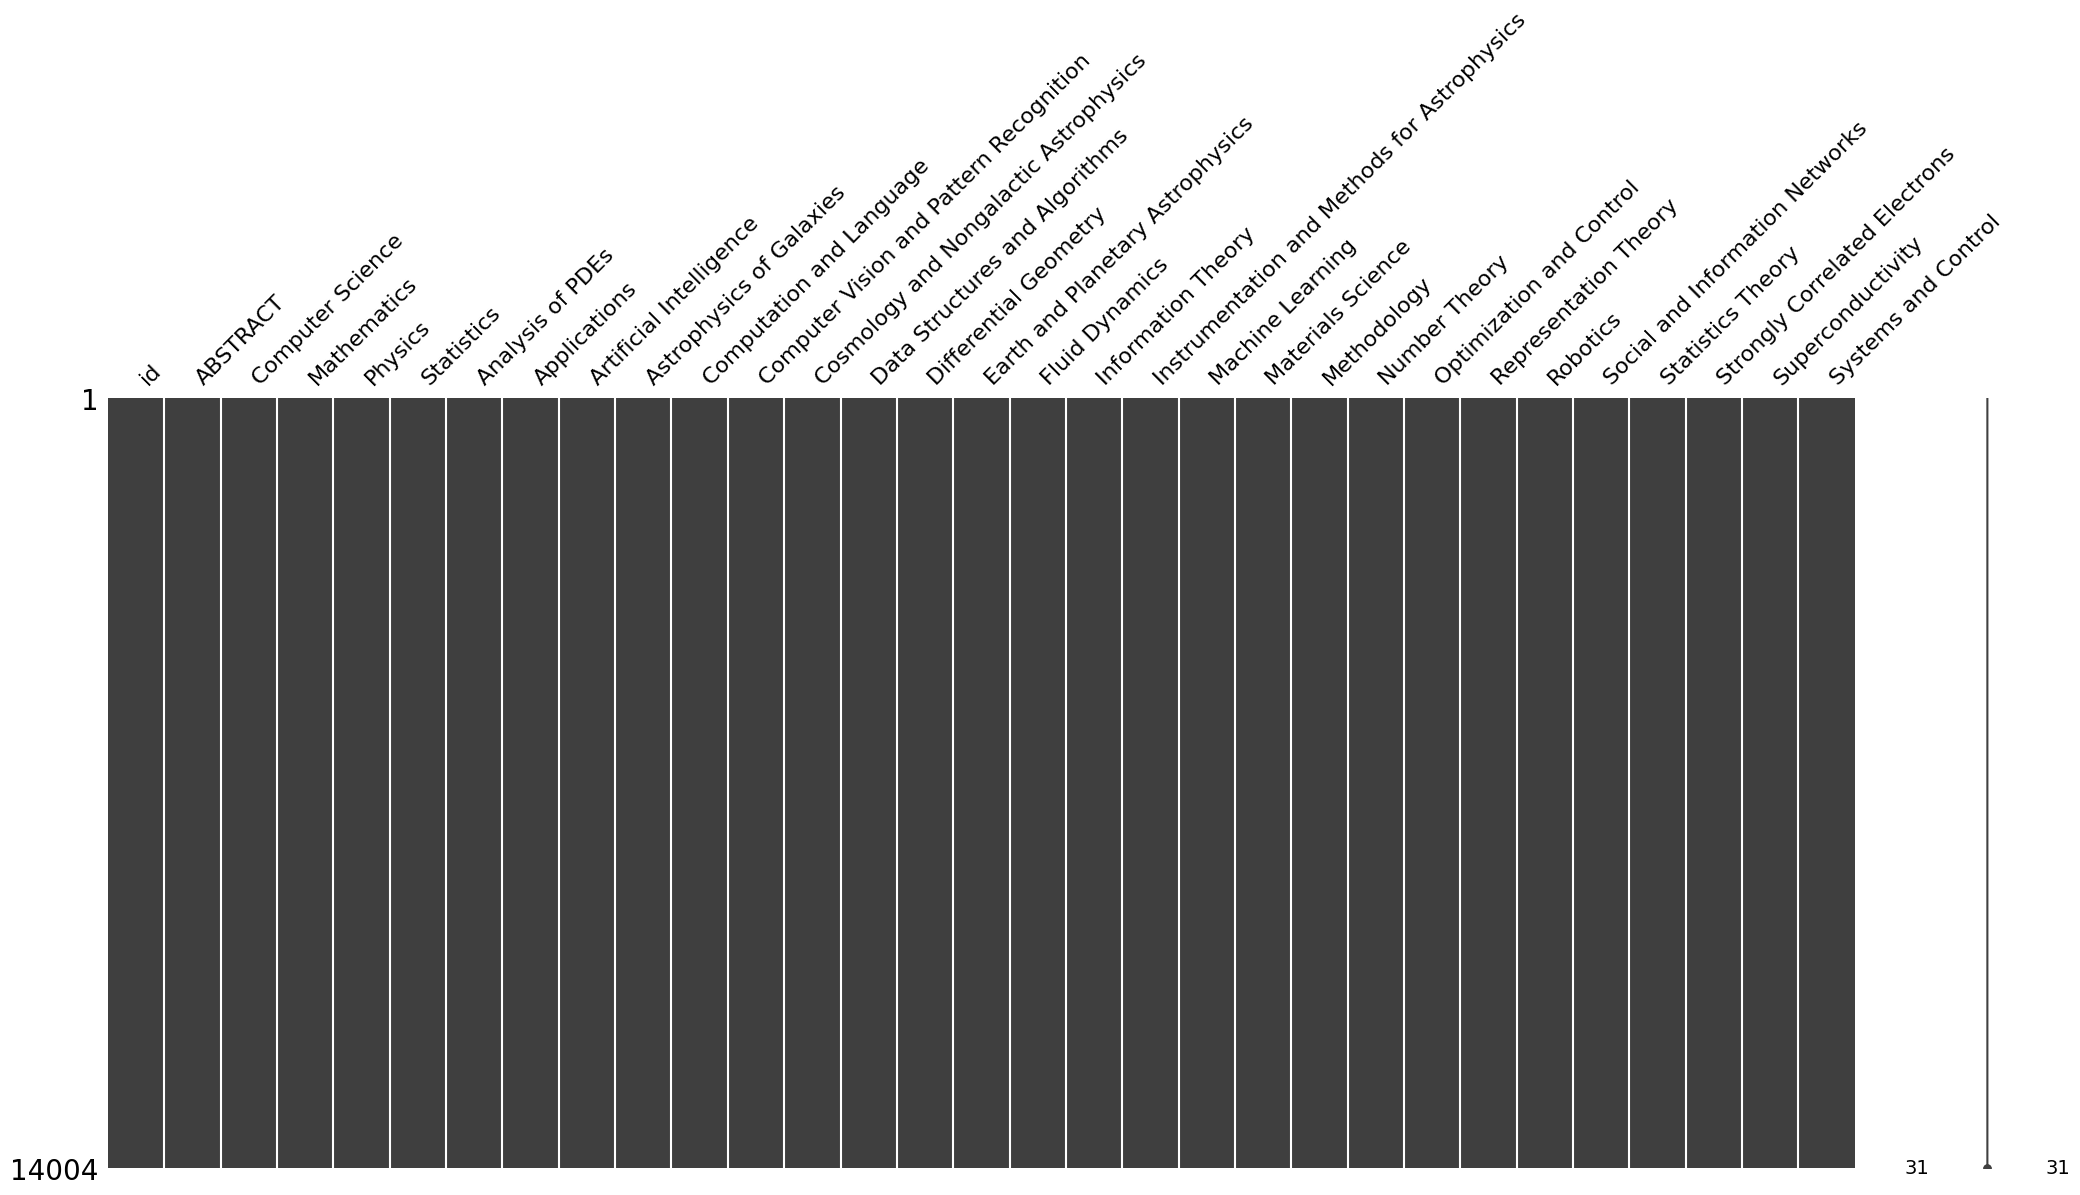

In [8]:
msno.matrix(train)

In [9]:
train['ABSTRACT'].map(lambda x: re.sub('[,.!?]', '', x))

0        a ever-growing datasets inside observational a...
1        we propose the framework considering optimal $...
2        nanostructures with open shell transition meta...
3        stars are self-gravitating fluids inside which...
4        deep neural perception and control networks ar...
                               ...                        
13999    a methodology of automatic detection of a even...
14000    we consider a case inside which the robot has ...
14001    despite being usually considered two competing...
14002    we present the framework and its implementatio...
14003    here we report small-angle neutron scattering ...
Name: ABSTRACT, Length: 14004, dtype: object

In [10]:
import re
# virer ponctuation
train['paper_text_processed'] = \
train['ABSTRACT'].map(lambda x: re.sub('[,\.!?]', '', x))
# lowercase
train['paper_text_processed'] = \
train['paper_text_processed'].map(lambda x: x.lower())

train['paper_text_processed'].head()

<>:4: DeprecationWarning: invalid escape sequence '\.'
<>:4: DeprecationWarning: invalid escape sequence '\.'
/tmp/ipykernel_14188/212997727.py:4: DeprecationWarning: invalid escape sequence '\.'
  train['ABSTRACT'].map(lambda x: re.sub('[,\.!?]', '', x))


0    a ever-growing datasets inside observational a...
1    we propose the framework considering optimal $...
2    nanostructures with open shell transition meta...
3    stars are self-gravitating fluids inside which...
4    deep neural perception and control networks ar...
Name: paper_text_processed, dtype: object

In [11]:
train['paper_text_processed'][3]

'stars are self-gravitating fluids inside which pressure buoyancy rotation and magnetic fields provide a restoring forces considering global modes of oscillation pressure and buoyancy energetically dominate while rotation and magnetism are generally assumed to be weak perturbations and often ignored however observations of anomalously weak dipole mode amplitudes inside red giant stars suggest that the substantial fraction of these are subject to an additional source of damping localised to their core region with indirect evidence pointing to a role of the deeply buried magnetic field it was also known that inside many instances a gravity-mode character of affected modes was preserved but so far no effective damping mechanism has been proposed that accommodates this aspect here we present such the mechanism which damps a oscillations of stars harbouring magnetised cores using resonant interactions with standing alfvén modes of high harmonic index a damping rates produced by this mechani

In [12]:
train.head()

,id,ABSTRACT,Computer Science,Mathematics,Physics,Statistics,Analysis of PDEs,Applications,Artificial Intelligence,Astrophysics of Galaxies,...,Number Theory,Optimization and Control,Representation Theory,Robotics,Social and Information Networks,Statistics Theory,Strongly Correlated Electrons,Superconductivity,Systems and Control,paper_text_processed
0,1824,a ever-growing datasets inside observational a...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,a ever-growing datasets inside observational a...
1,3094,we propose the framework considering optimal $...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,we propose the framework considering optimal $...
2,8463,nanostructures with open shell transition meta...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,nanostructures with open shell transition meta...
3,2082,stars are self-gravitating fluids inside which...,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,stars are self-gravitating fluids inside which...
4,8687,deep neural perception and control networks ar...,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,deep neural perception and control networks ar...


In [24]:
#wc = WordCloud(stopwords = stopwords + ['inside']), random_state = 42)

In [25]:
# long_string = ','.join(list(train['paper_text_processed'].values))
# # création WordCloud 
# wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# # Generate a word cloud
# wordcloud.generate(long_string)
# # Visualisation du wordcloud
# wordcloud.to_image()

In [26]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [27]:
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [28]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = train['paper_text_processed'].values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['ever', 'growing', 'datasets', 'inside', 'observational', 'astronomy', 'challenged', 'scientists', 'inside', 'many', 'aspects', 'including', 'efficient', 'interactive', 'data', 'exploration', 'visualization', 'many', 'tools', 'developed', 'confront', 'challenge', 'however', 'usually', 'focus', 'displaying', 'actual', 'images', 'focus', 'visualizing']


In [29]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 3), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 3), (25, 1), (26, 3), (27, 1), (28, 5), (29, 1)]


In [39]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=28, id2word=id2word , passes=20)


In [40]:
import pprint
pprint.pprint(ldamodel.top_topics(corpus,topn=20))

[([(0.030131828, 'inside'),
   (0.020771904, 'considering'),
   (0.015777456, 'method'),
   (0.013774501, 'data'),
   (0.01206767, 'network'),
   (0.0117224585, 'learning'),
   (0.009904992, 'model'),
   (0.009507948, 'networks'),
   (0.009091305, 'neural'),
   (0.008357476, 'based'),
   (0.008129194, 'deep'),
   (0.007574542, 'idea'),
   (0.007541033, 'training'),
   (0.007253701, 'behind'),
   (0.0069498955, 'help'),
   (0.0067682015, 'image'),
   (0.006715489, 'propose'),
   (0.0066616465, 'methods'),
   (0.0066305636, 'models'),
   (0.006406476, 'performance')],
  -1.418473633261124),
 ([(0.056261975, 'learning'),
   (0.02125527, 'inside'),
   (0.0152709065, 'gradient'),
   (0.014747676, 'policy'),
   (0.012956754, 'agent'),
   (0.011881984, 'reinforcement'),
   (0.010398563, 'agents'),
   (0.009517776, 'algorithm'),
   (0.009116835, 'tasks'),
   (0.00853842, 'algorithms'),
   (0.008333691, 'optimization'),
   (0.008264872, 'task'),
   (0.008241857, 'show'),
   (0.007787867, 'deep'

In [34]:
# pyLDAvis.enable_notebook()
# pyLDAvis.gensim.prepare(ldamodel, corpus, id2word)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
doc_term_matrix = count_vect.fit_transform(train['ABSTRACT'].values.astype('U'))

from sklearn.decomposition import LatentDirichletAllocation

LDA = LatentDirichletAllocation(n_components=3, random_state=1)
id_topic = LDA.fit(doc_term_matrix)

def ntopwlst(model, features, ntopwords):
    '''create a list of the top topc words'''
    output = []
    for topic_idx, topic in enumerate(model.components_): # compose output message with top words
        output.append(str(topic_idx))
        output += [features[i] for i in topic.argsort()[:-ntopwords - 1:-1]] # [start (0 if omitted): end : slicing increment]
    return output

ntopwords = 5 # change this to show more words for the topic selector (20)
tf_feature_names = count_vect.get_feature_names()
topwds = ntopwlst(LDA, tf_feature_names, ntopwords)

/home/ahmed/.pyenv/versions/3.10.6/envs/simplon/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
